In this method trying to select the shallowest and deepest 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
from shapely.geometry import Point
import random

In [3]:
survey2 = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_C_MERGE_CORRECTED.csv')

geometry = [Point(xy) for xy in zip(survey2.X, survey2.Y)]
crs = {'init': 'epsg:4326'}
geosurvey2 = gpd.GeoDataFrame(survey2, crs=crs, geometry=geometry)

geosurvey2['masked']=0
geosurvey2['Prediction']=0

In [4]:
df_copy2 = geosurvey2.copy()

In [5]:
#make empty list/df for selection
selec_df2 = gpd.GeoDataFrame(columns=['Y', 'X', 'Depth','Selection', 'masked', 'Prediction'])

In [6]:
while len(df_copy2) > 0:

    #reset indexes
    df_copy2.reset_index(drop=True, inplace=True) 

    #find lowest value
    min_val= df_copy2['Depth'].min()
    print (min_val, "m was selected")

    #find its location in copysurvey
    places  =  df_copy2[df_copy2.Depth == min_val].index

    if len(places)> 1:
        pred_index = random.choice(places)
    else:
        pred_index = places[0]
    print (pred_index)

    # add it as a record to the selection list
    selec_df2 =selec_df2.append(df_copy2.iloc[pred_index])

    #create buffer around selected point
    #distance = 0.003
    if min_val < 6:
        distance = 0.002
    elif min_val < 15:
        distance = 0.003
    elif min_val <30:
        distance = 0.004
    else:
        distance = 0.006
    polygon = df_copy2.iloc[pred_index,5].buffer(distance)

    # delete everything in the buffer & delete the selected sounding
    for index, row in df_copy2.iterrows():
        if row['geometry'].within(polygon):
            df_copy2.loc[index, 'masked'] = 1

        if index % 100000 == 0:
            print(index)

    #find highest value
    max_val= df_copy2['Depth'].max()
    print (max_val, "m was selected")

    #find its location in copysurvey
    places2  =  df_copy2[df_copy2.Depth == max_val].index

    if len(places2)> 1:
        pred_index_max = random.choice(places)
    else:
        pred_index_max = places2[0]
    #print (pred_index)

    # add it as a record to the selection list
    selec_df2 =selec_df2.append(df_copy2.iloc[pred_index_max])

    #create buffer around selected point
    distance = 0.002
    polygon = df_copy2.iloc[pred_index_max,5].buffer(distance)

    # delete everything in the buffer & delete the selected sounding
    for index, row in df_copy2.iterrows():
        if row['geometry'].within(polygon):
            df_copy2.loc[index, 'masked'] = 1

        if index % 100000 == 0:
            print(index)            

    df_copy2 = df_copy2[df_copy2.masked == 0]

    print(len(df_copy2), " data points remaining.")

print("Selection contains ",len(selec_df2), " soundings.")

5.69 m was selected
3374019
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
25.283 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3253802  data points remaining.
5.883 m was selected
3253687
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
25.097 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000

1063555  data points remaining.
18.795 m was selected
520935
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
25.097 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
831319  data points remaining.
19.211 m was selected
473785
0
100000
200000
300000
400000
500000
600000
700000
800000
25.097 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
708316  data points remaining.
19.54 m was selected
708289
0
100000
200000
300000
400000
500000
600000
700000
25.097 m was selected
0
100000
200000
300000
400000
500000
600000
700000
614780  data points remaining.
19.837 m was selected
2556
0
100000
200000
300000
400000
500000
600000
25.097 m was selected
0
100000
200000
300000
400000
500000
600000
480245  data points remaining.
19.901 m was selected
262266
0
100000
200000
300000
400000
25.097 m was selected
0
100000
200000
300000
400000
443070  data points remaining.
20.535 m was selected
272833
0
100000
200000
3000

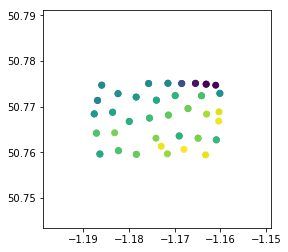

In [7]:
selec_df2.plot(column='Depth')
plt.show()

In [8]:
selec_df2.to_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_STEPSELECTION_MINMAX_IF.csv')
